In [81]:
%matplotlib inline
import numpy as np
import pandas as pd 
import geohash
import datetime
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [82]:
bird = pd.read_csv("bird_data_pickups.csv")
bird = bird.drop(['day'], axis=1)
bird.head()
#split dataset in features and target variable
feature_cols = ['geohash','day_of_week', 'weekend','hour','minute'] # remove 'geohash'
X = bird[feature_cols] # Features
y = bird.n # Target variable

In [83]:
# Get the longitude and latitude from the geohash
def decodegeo(geo, which):
    if len(geo) >= 6:
        geodecoded = geohash.decode(geo)
        return geodecoded[which]
    else:
        return 0
X['latitude'] = X['geohash'].apply(lambda geo: decodegeo(geo, 0))
X['longitude'] = X['geohash'].apply(lambda geo: decodegeo(geo, 1))
X = X.drop(['geohash'], axis=1)

In [84]:
X_train =  X[(X['day_of_week'] != 3) & (X['day_of_week'] != 5) ]
print("Train set:", X_train.shape)

X_test = X[(X['day_of_week'] == 3) | (X['day_of_week'] == 5) ]
print( "Test set:", X_test.shape)

y_train = y.loc[X_train.index.values]
y_test = y.loc[X_test.index.values]

# X_train = X_train.drop(['day_of_week'], axis=1)
# X_test = X_test.drop(['day_of_week'], axis=1)
print(X_train.head())
print(X_test.head())

Train set: (922, 6)
Test set: (641, 6)
    day_of_week  weekend  hour  minute   latitude   longitude
68            6        1    23      25  34.021912 -118.493042
71            6        1    23      20  34.021912 -118.493042
73            6        1    23      10  34.021912 -118.493042
74            6        1    23      15  34.021912 -118.493042
75            6        1    23      30  34.021912 -118.493042
   day_of_week  weekend  hour  minute   latitude   longitude
0            5        0    21      10  34.016418 -118.493042
1            5        0    21      20  34.016418 -118.493042
2            5        0    21       5  34.016418 -118.493042
3            5        0    21      15  34.016418 -118.493042
4            5        0    21       0  34.016418 -118.493042


In [85]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
print(linearRegressor.intercept_)
print(linearRegressor.coef_)

11025.874506168755
[ 8.89223761e-01 -1.34543896e+00  3.25272304e-01  6.13631742e-03
 -1.02141915e+03 -2.00331723e+02]


In [87]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
day_of_week,0.889224
weekend,-1.345439
hour,0.325272
minute,0.006136
latitude,-1021.419153
longitude,-200.331723


In [88]:
y_pred = regressor.predict(X_test)

In [93]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

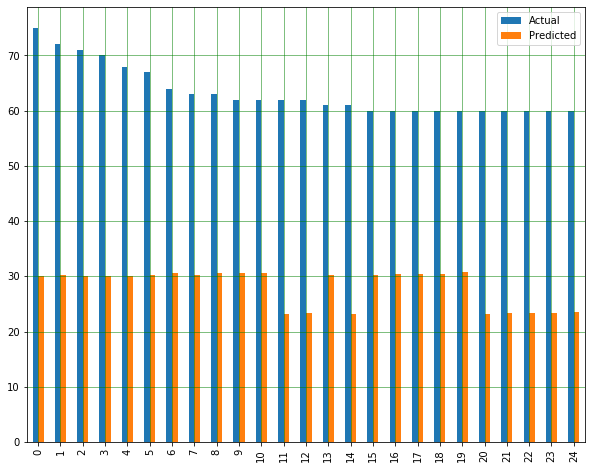

In [94]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 13.830664502438133
Mean Squared Error: 268.5339656297776
Root Mean Squared Error: 16.38700599956495
